# chunked_func
an example for the use of porespy.filters.chunked_func

Applies the function spcified by "func" to the input image in parallel using dask.
If "cores" is 1, one chunk is porcessed at a time, saving memory. If "cores" is larger than one, then multiple cores are processed at once, saving time.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
from skimage.morphology import ball

## Create image and variables:

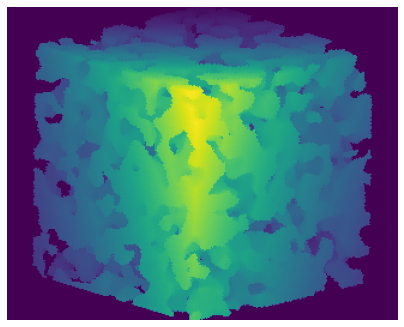

In [2]:
func = spim.binary_dilation
im = ps.generators.blobs(shape=[200, 200, 200])
kwargs = {"input": im, "structure" : ball(3)}

three_d1 = ps.visualization.show_3D(im)
plt.figure(figsize=[7, 7])
plt.axis(False)
plt.imshow(three_d1)

#default values:
overlap = None
divs = 2
cores = None
im_arg = ["input", "image", "im"]
strel_arg = ["strel", "structure", "footprint"]

## Apply filter function:
With different parameters

### func

Text(0.5, 1.0, 'func = binary_erosion')

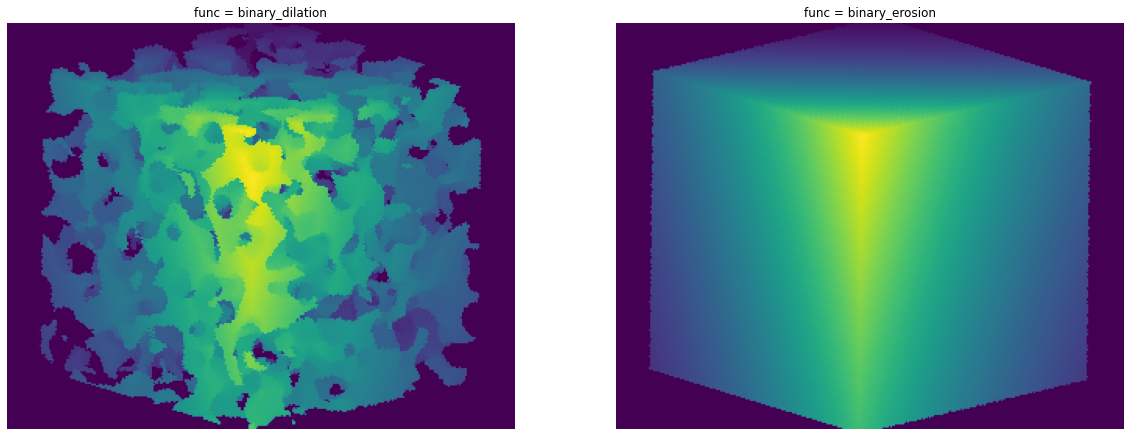

In [3]:
f2 = spim.binary_erosion
x = ps.filters.chunked_func(func, overlap, divs, cores, im_arg, strel_arg, **kwargs)
xx = ps.filters.chunked_func(f2, overlap, divs, cores, im_arg, strel_arg, **kwargs)
x3d = ps.visualization.show_3D(x)
xx3d = ps.visualization.show_3D(xx)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x3d);
ax[1].imshow(xx3d);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('func = binary_dilation')
ax[1].set_title('func = binary_erosion')

### overlap

Text(0.5, 1.0, 'overlap = 25')

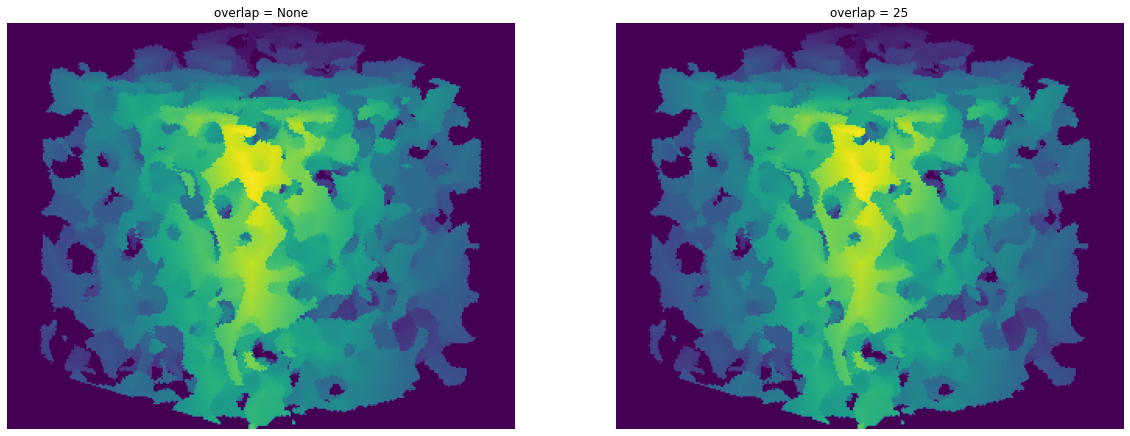

In [4]:
xx = ps.filters.chunked_func(func, 25, divs, cores, im_arg, strel_arg, **kwargs)
xx3d = ps.visualization.show_3D(xx)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x3d);
ax[1].imshow(xx3d);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('overlap = None')
ax[1].set_title('overlap = 25')

### divs

Text(0.5, 1.0, 'divs = 10')

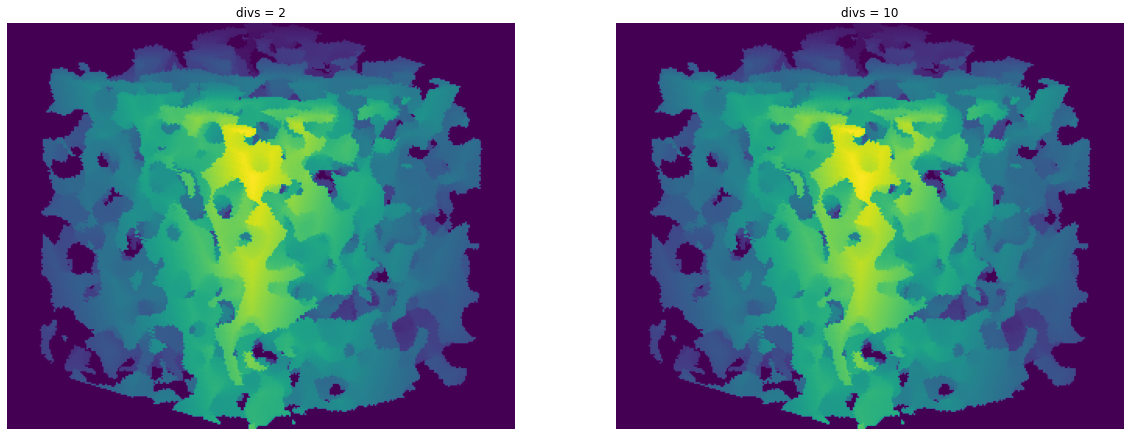

In [5]:
xx = ps.filters.chunked_func(func, overlap, 10, cores, im_arg, strel_arg, **kwargs)
xx3d = ps.visualization.show_3D(xx)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x3d);
ax[1].imshow(xx3d);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('divs = 2')
ax[1].set_title('divs = 10')

### cores

Text(0.5, 1.0, 'cores = 1')

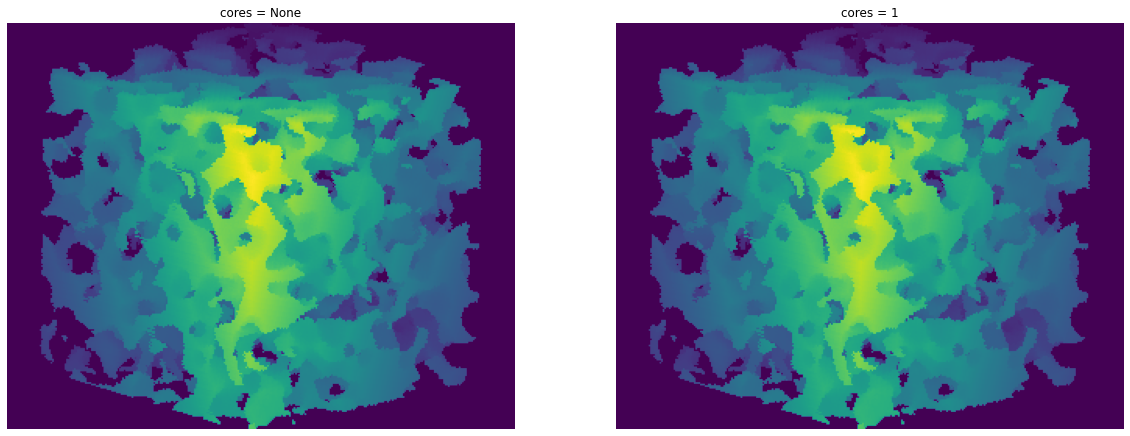

In [6]:
xx = ps.filters.chunked_func(func, overlap, divs, 1, im_arg, strel_arg, **kwargs)
xx3d = ps.visualization.show_3D(xx)

fig, ax = plt.subplots(1, 2, figsize=[20, 20]);
ax[0].imshow(x3d);
ax[1].imshow(xx3d);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('cores = None')
ax[1].set_title('cores = 1')